<a href="https://colab.research.google.com/github/Suma-Mandru/base/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average of temperature for a month:
33.42
maximum temperature in given days:
42.5
minimum temperature in given days:
26.9
number of days the temperature exceeded threshold is: 12


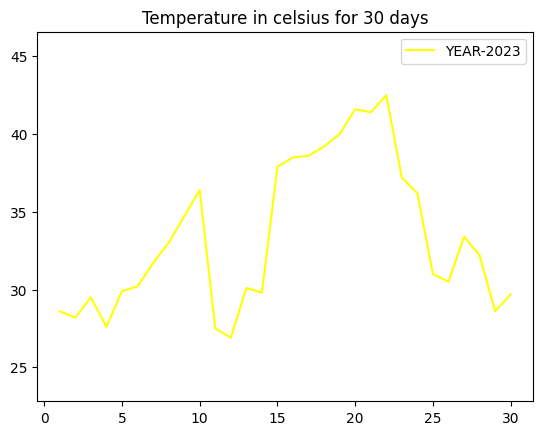

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel("/content/Book1.xlsx")
mv=data["Temperature"].mean()
max=data["Temperature"].max()
min=data["Temperature"].min()
data=data.fillna(mv)
print("Average of temperature for a month:")
print(mv)
print("maximum temperature in given days:")
print(max)
print("minimum temperature in given days:")
print(min)
day=0
for i in data['Temperature']:
  if(i>mv):
    day=day+1
print("number of days the temperature exceeded threshold is:",day)
plt.plot(data['Days'],data["Temperature"],label="YEAR-2023",color='yellow')
plt.legend(loc='best')
plt.axis('equal')
plt.title("Temperature in celsius for 30 days")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
import re #for data cleaning purpose
import string
#from sklearn.linear_model import LogisticRegression
data_true=pd.read_csv("/content/true.csv")
data_true.head()

,test,cccc
0,ab,1
1,cd,1
2,ef,1
3,gh,1
4,ij,1


In [ ]:
data_false=pd.read_csv("/content/false.csv")
data_false.head()

,test,cccc
0,c1,False
1,c2,False
2,c3,False
3,c4,False
4,c5,False


In [ ]:
print(data_true.shape)
print(data_false.shape)
data_true["class"]=1
data_false["class"]=0

(10, 2)
(10, 2)


In [ ]:
data_true_manual_testing = data_true.tail(10)
for i in range(5,10,-1):
  data_true.drop([i],axis=0, inplace=True)
data_false_manual_testing = data_false.tail(10)
for i in range(5,10,-1):
  data_false.drop([i],axis=0, inplace=True)
data_manual_testing = pd.concat([data_false_manual_testing,data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")
data_merge = pd.concat([data_false,data_true],axis=0)
data_merge.head(10)

,test,cccc,class
0,c1,0,0
1,c2,0,0
2,c3,0,0
3,c4,0,0
4,c5,0,0
5,c6,0,0
6,c7,0,0
7,c8,0,0
8,c9,0,0
9,c10,0,0


class
0    10
1    10
Name: test, dtype: int64


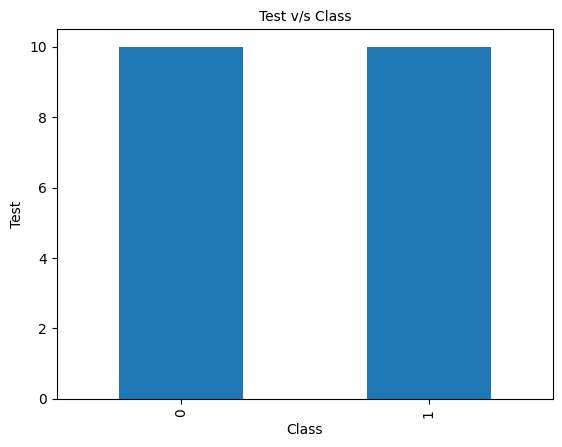

In [ ]:
print(data_merge.groupby(['class'])['test'].count())
data_merge.groupby(['class'])['test'].count().plot(kind="bar")
plt.title("Test v/s Class",size=10)
plt.xlabel("Class",size=10)
plt.ylabel("Test",size=10)
plt.show()

class
0    10
1    10
Name: test, dtype: int64
0 = False news
1 = True news


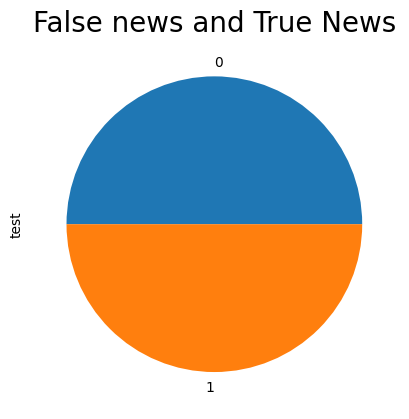

In [ ]:
print(data_merge.groupby(['class'])['test'].count())
print("0 = False news\n1 = True news")
data_merge.groupby(['class'])['test'].count().plot(kind="pie")
plt.title("False news and True News",size=20)
plt.show()

In [ ]:
data_merge=pd.read_csv("/content/manual_testing.csv ")
print(data_merge)

    Unnamed: 0 test  cccc  class
0            0   c1     0      0
1            1   c2     0      0
2            2   c3     0      0
3            3   c4     0      0
4            4   c5     0      0
5            5   c6     0      0
6            6   c7     0      0
7            7   c8     0      0
8            8   c9     0      0
9            9  c10     0      0
10           0   ab     1      1
11           1   cd     1      1
12           2   ef     1      1
13           3   gh     1      1
14           4   ij     1      1
15           5   kl     1      1
16           6   mn     1      1
17           7   op     1      1
18           8   qr     1      1
19           9   st     1      1


In [ ]:
data = data_merge.drop(["Unnamed: 0","cccc"], axis=1)
data.head(10)

,test,class
0,c1,0
1,c2,0
2,c3,0
3,c4,0
4,c5,0
5,c6,0
6,c7,0
7,c8,0
8,c9,0
9,c10,0


In [ ]:
data=data.sample(frac=1)
data.head(20)

,test,class
19,st,1
5,c6,0
14,ij,1
4,c5,0
16,mn,1
7,c8,0
18,qr,1
8,c9,0
6,c7,0
17,op,1


In [ ]:
data.isnull().sum()

test     0
class    0
dtype: int64

In [ ]:
X=data_true["class"]
y=data_true["test"]

In [ ]:
print(f"Number of samples in x: {len(X)}")
print(f"Number of samples in y: {len(y)}")

Number of samples in x: 10
Number of samples in y: 10


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = ttp(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
print(X_train.head())

5    1
0    1
7    1
2    1
9    1
Name: class, dtype: int64


In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [ ]:
if type(X_train[0]) != str or type(X_test[0]) != str:
  X_train = [str(X) for X in X_train]
  X_test = [str(X) for X in X_test]

In [ ]:
import string #to deal with text data
import numpy as np
X_train = [str(X) for  x in X_train]
vector = TfidfVectorizer()
xv_train=vector.fit_transform(X_train)
xv_test=vector.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train) #training or fitting the model to the training set
accuracy = LR.score(xv_test,y_test).round(2) # method computes the accuracy␣
print("Accuracy is" , accuracy)
pred_LR= LR.predict(xv_test) # Predict using the linear model
print(classification_report(y_test,pred_LR))

Accuracy is 0.0
              precision    recall  f1-score   support

          ab       0.00      0.00      0.00       0.0
          cd       0.00      0.00      0.00       1.0
          qr       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

      name  study   fee
0  sravani      7  3000
1    satya      8  4000
2  keerthi      9  5000
3  iswarya     10  6000
4      sai     11  7000
Mean Squared Error: 0.49999999999999645


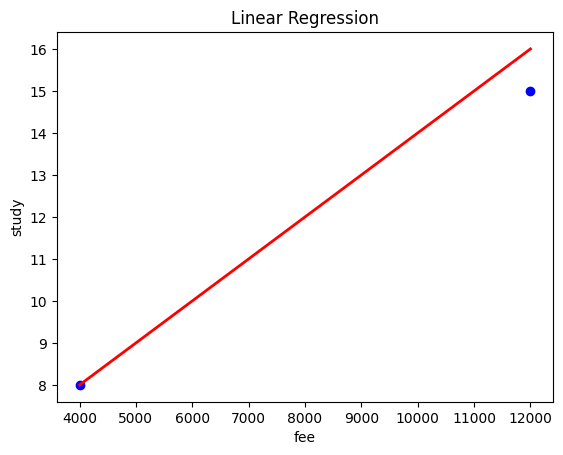

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the CSV dataset
data = pd.read_csv('/content/FEES.csv')

# Display the first few rows of the dataset
print(data.head())

# Split the data into features (X) and target variable (y)
X = data[['fee']]
y = data['study']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the data and regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('fee')
plt.ylabel('study')
plt.title('Linear Regression')
plt.show()

In [ ]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt #for visualizing dataset
true=pd.read_excel("/content/text_t.xlsx")
fake=pd.read_excel("/content/title_f.xlsx")
print(true.head(10))
print(fake.head(10))
print(true.shape)
print(fake.shape)
true["class"]=1
fake["class"]=0
dt=true.head(9)
for i in range(9,0,-1):
  true.drop([i],axis=0,inplace=True)
df=fake.head(9)
for i in range(9,0,-1):
  fake.drop([i],axis=0,inplace=True)
dm=pd.concat([df,dt],axis=0)
dm.to_excel("manual.xlsx")

                                             title
0  Donald Trump just couldn t wish all Americans …
1  House Intelligence Committee Chairman Devin Nu…
2  On Friday, it was revealed that former Milwauk…
3  On Christmas day, Donald Trump announced that …
4  Pope Francis used his annual Christmas Day mes…
5  The number of cases of cops brutalizing and ki…
6  Donald Trump spent a good portion of his day a…
7  In the wake of yet another court decision that…
8  Many people have raised the alarm regarding th…
9  Just when you might have thought we d get a br…
                                            title
0   Donald Trump Sends Out Embarrassing New Year’
1  Drunk Bragging Trump Staffer Started Russian …
2  Sheriff David Clarke Becomes An Internet Joke…
3  Trump Is So Obsessed He Even Has Obama’s Name…
4  Pope Francis Just Called Out Donald Trump Dur…
5  Racist Alabama Cops Brutalize Black Boy While…
6  Fresh Off The Golf Course, Trump Lashes Out A…
7  Trump Said Some INSANELY Racist Stuf

In [ ]:
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
data=pd.read_excel("manual.xlsx")
x=data["title"]
y=data["class"]
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)
#Logistic Regression:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)
accuracy = LR.score(xv_test,y_test).round(2)
print("Accuracy is" , accuracy)
pred_LR= LR.predict(xv_test)
print(classification_report(y_test,pred_LR))

Accuracy is 0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [6]:
# Define data generators for train, validation and test sets
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain_Tumor_Detection/Brain_Tumor_Detection/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 2416 images belonging to 2 classes.


In [9]:
val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain_Tumor_Detection/Brain_Tumor_Detection/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 604 images belonging to 2 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain_Tumor_Detection/Brain_Tumor_Detection/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 70 images belonging to 1 classes.


In [11]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
76/76 [==============================] - 355s 5s/step - loss: 0.2339 - accuracy: 0.9102 - val_loss: 0.2066 - val_accuracy: 0.9040
Epoch 2/5
76/76 [==============================] - 315s 4s/step - loss: 0.1226 - accuracy: 0.9578 - val_loss: 0.1889 - val_accuracy: 0.9288
Epoch 3/5
76/76 [==============================] - 326s 4s/step - loss: 0.0692 - accuracy: 0.9810 - val_loss: 0.0690 - val_accuracy: 0.9702
Epoch 4/5
76/76 [==============================] - 324s 4s/step - loss: 0.0403 - accuracy: 0.9880 - val_loss: 0.1132 - val_accuracy: 0.9503
Epoch 5/5
76/76 [==============================] - 319s 4s/step - loss: 0.0290 - accuracy: 0.9942 - val_loss: 0.0150 - val_accuracy: 0.9967


In [ ]:
model.save("Model.h5","label.txt")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#test your image
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

#load the model
model = load_model('/content/Model.h5')
#classes
class_names = ['You have Brain Tumor','You do not have Brain Tumor']
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [ ]:
image = Image.open("/content/drive/MyDrive/Brain_Tumor_Detection/Brain_Tumor_Detection/test/pred/pred15.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

In [ ]:
# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
confidence_score = prediction[0][index]
# Print prediction and confidence score
print("Result: ", class_names[index], end="")
print("\n")
print("Accuracy: ", confidence_score)

1/1 [==============================] - 0s 92ms/step
Result:  You have Brain Tumor

Accuracy:  1.0
